In [1]:
import split_folders

In [3]:
split_folders.ratio('data', output="output", seed=1337, ratio=(.8, .2)) # default values

In [1]:
from keras.layers import Dense,GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
from keras.applications import VGG16
 
vgg_conv = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

W1210 21:18:31.206855 20668 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\keras-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1210 21:18:31.218823 20668 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\keras-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1210 21:18:31.220824 20668 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\keras-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1210 21:18:31.245751 20668 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\keras-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1210 21:18:31.5649

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

In [4]:
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

In [5]:
# initialize the number of training epochs and batch size
NUM_EPOCHS = 25
BS = 32

In [6]:
# derive the path to the directories containing the training,
# validation, and testing splits, respectively
TRAIN_PATH = r'E:\doc_classification\output\train'
VAL_PATH = r'E:\doc_classification\output\val'
 
# determine the total number of image paths in training, validation,
# and testing directories
totalTrain = len(list(paths.list_images(TRAIN_PATH)))
totalVal = len(list(paths.list_images(VAL_PATH)))


In [7]:
totalTrain

2782

In [8]:
totalVal

700

In [15]:
# initialize the training training data augmentation object
trainAug = ImageDataGenerator(
    rescale=1 / 255.0
    )
 
# initialize the validation (and testing) data augmentation object
valAug = ImageDataGenerator(rescale=1 / 255.0)

In [16]:
# initialize the training generator
trainGen = trainAug.flow_from_directory(
    TRAIN_PATH,
    class_mode="categorical",
    target_size=(224, 224),
    color_mode="rgb",
    shuffle=True,
    batch_size=BS)
 
# initialize the validation generator
valGen = valAug.flow_from_directory(
    VAL_PATH,
    class_mode="categorical",
    target_size=(224, 224),
    color_mode="rgb",
    shuffle=False,
    batch_size=BS)

Found 2782 images belonging to 10 classes.
Found 700 images belonging to 10 classes.


In [17]:
x=vgg_conv.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
#x=Dense(1024,activation='relu')(x) #dense layer 2
#x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(10,activation='softmax')(x) #final layer with softmax activation

In [18]:
model=Model(inputs=vgg_conv.input,outputs=preds)

In [19]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
# Train the model
history = model.fit_generator(
      trainGen,
      steps_per_epoch=trainGen.samples/trainGen.batch_size ,
      epochs=30,
      validation_data=valGen,
      validation_steps=valGen.samples/valGen.batch_size,
      verbose=1)

Epoch 1/30
87/86 [==============================] - 69s 788ms/step - loss: 15.5677 - acc: 0.0341 - val_loss: 15.5424 - val_acc: 0.0357
Epoch 2/30
87/86 [==============================] - 62s 717ms/step - loss: 15.5673 - acc: 0.0342 - val_loss: 15.5424 - val_acc: 0.0357
Epoch 3/30
87/86 [==============================] - 63s 720ms/step - loss: 15.5677 - acc: 0.0341 - val_loss: 15.5424 - val_acc: 0.0357
Epoch 4/30
87/86 [==============================] - 65s 748ms/step - loss: 15.5677 - acc: 0.0341 - val_loss: 15.5424 - val_acc: 0.0357
Epoch 5/30
87/86 [==============================] - 63s 724ms/step - loss: 15.5677 - acc: 0.0341 - val_loss: 15.5424 - val_acc: 0.0357
Epoch 6/30
87/86 [==============================] - 61s 705ms/step - loss: 15.5669 - acc: 0.0342 - val_loss: 15.5424 - val_acc: 0.0357
Epoch 7/30
87/86 [==============================] - 62s 715ms/step - loss: 15.5681 - acc: 0.0341 - val_loss: 15.5424 - val_acc: 0.0357
Epoch 8/30
14/86 [===>..........................] - ETA

KeyboardInterrupt: 

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random
import sys
import gc
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelBinarizer
import PIL
from PIL import Image
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import keras
from keras import layers
from keras import metrics
from keras.models import load_model
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Dropout
from keras import optimizers
from keras import models
from keras.models import Sequential
from keras import preprocessing
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications import VGG16
from keras.utils import plot_model

In [29]:
img_size = 224
batch_size = 32
epochs = 100
train_size = 0.8
val_size = 0.1
test_size = 0.1
seed = 4321
channels = 3
learning_rate = 0.00001

['ADVE', 'Email', 'Form', 'Letter', 'Memo', 'News', 'Note', 'Report', 'Resume', 'Scientific']
[231, 600, 432, 568, 621, 189, 202, 266, 121, 262]


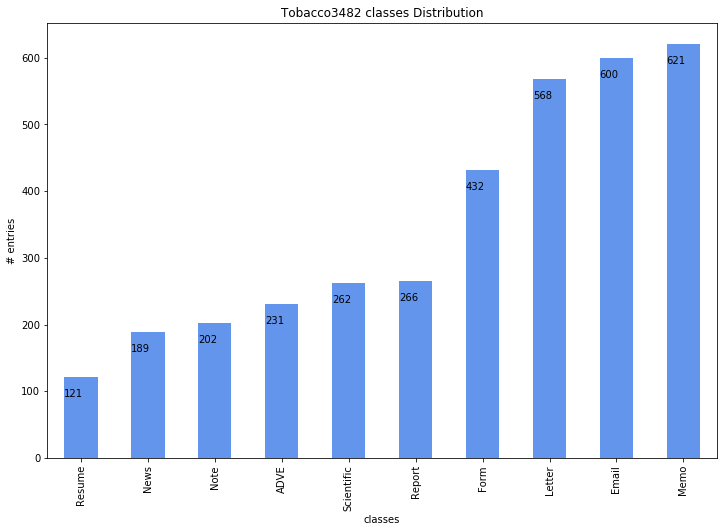

In [25]:
d = 'data'
PATH = ''

classes = (os.listdir(d))

paths = [os.path.join(d, o) for o in os.listdir(d) 
                    if os.path.isdir(os.path.join(d,o))]

nbEntries = []

for i in range(len(classes)):
    nbEntries.append(len(os.listdir(paths[i])))

#################################################
    
print(classes)
print(nbEntries)

df = pd.DataFrame({'classes':classes, 'entries':nbEntries})
ax = df.sort_values(by='entries', ascending=True).plot.bar(x='classes', y='entries', color='cornflowerblue',legend=False, figsize=(12,8))
ax.set_title('Tobacco3482 classes Distribution')
ax.set_ylabel("# entries")
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()-30))

In [27]:
total_set = []
total_labels = []


for root, dirs, files in os.walk(d):
    for file in files:
        if file.endswith(".tif"):
            path = os.path.join(root, file)
            total_set.append(path)
            total_labels.append(root.split(os.path.sep)[-1])
            

# Return image class based on list entry (path)         
def getClass(img):
    return img.split(os.path.sep)[-2]


print(total_set[0])
print('GetClass : ', getClass(total_set[0]))
print('Label : ', total_labels[0])

data\ADVE\0000136188.tif
GetClass :  ADVE
Label :  ADVE


data\Form\2043460274-b.tif


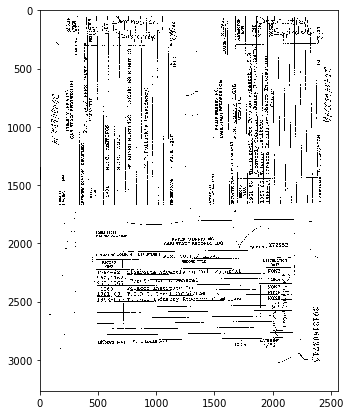

data\Report\510832749.tif


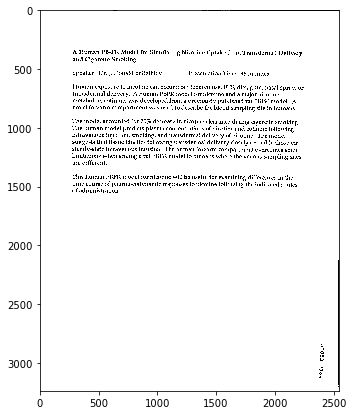

data\Email\2070046454a.tif


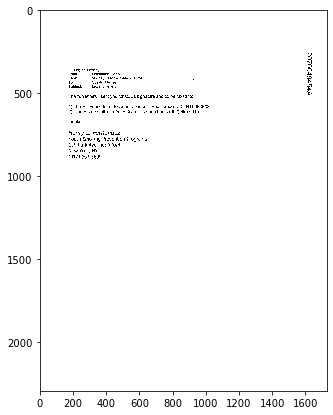

In [28]:
random.Random(seed).shuffle(total_set)

for ima in total_set[0:3] :
    print(ima)
    img = mpimg.imread(ima)
    plt.figure(figsize=(7,7))
    imgplot = plt.imshow(img, cmap="gray")
    plt.show()

In [30]:
#Get data and separate it in sets
total_len = len(total_set)
index = 0

train_set = []
train_label = []

val_set = []
val_label = []

test_set = []
test_label = []


for i in total_set[0: int(total_len*train_size)] :
    train_set.append(i)
    train_label.append(getClass(i))
    
index = int(total_len*train_size)+1
    
for i in total_set[index: int(index + total_len*val_size)] :
    val_set.append(i)
    val_label.append(getClass(i))
    
index = int(index + total_len*val_size)+1 

for i in total_set[index: total_len] :
    test_set.append(i)
    test_label.append(getClass(i))

print(val_set[200])
print(val_label[200])

data\Letter\60020317.tif
Letter


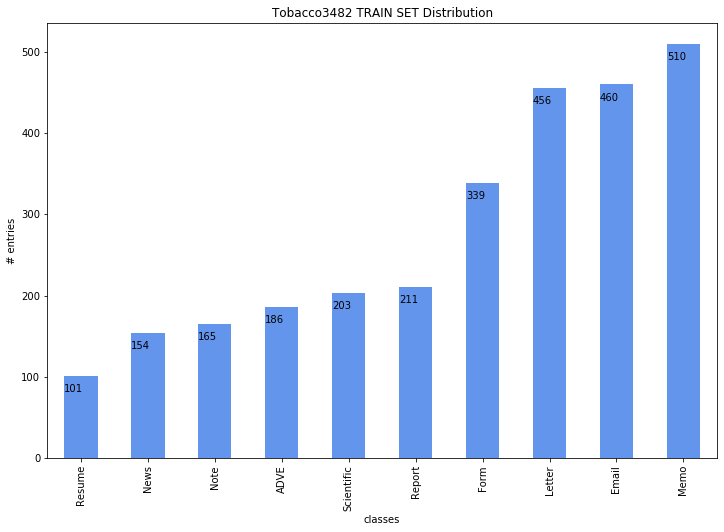

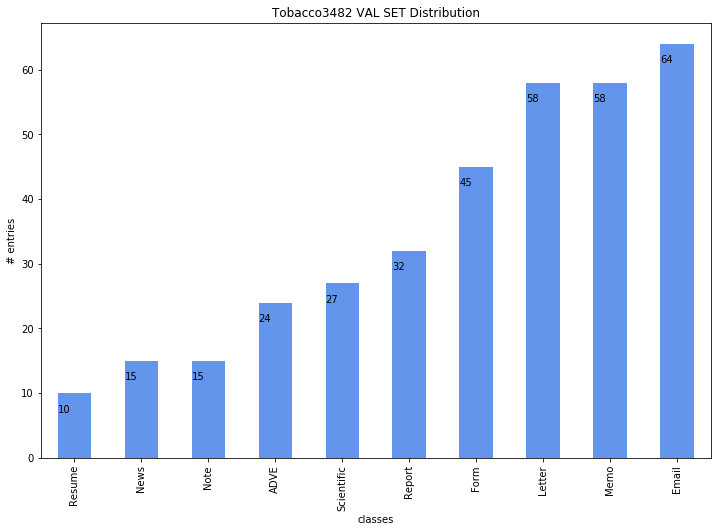

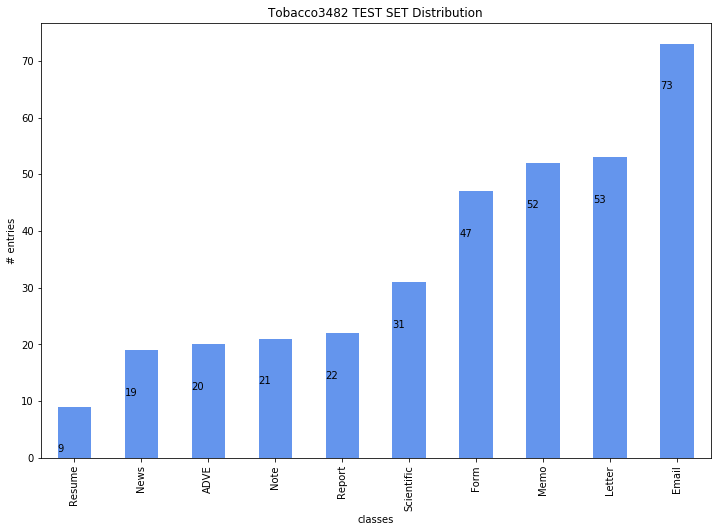

In [31]:
#################################################
# TRAIN SET
instances = [0] * len(classes)
for index, val in enumerate(classes) :
    for e in train_set :
        if(val == getClass(e)) :
            instances[index] += 1

            
df = pd.DataFrame({'classes':classes, 'entries':instances})
ax = df.sort_values(by='entries', ascending=True).plot.bar(x='classes', y='entries', color='cornflowerblue',legend=False, figsize=(12,8))
ax.set_title('Tobacco3482 TRAIN SET Distribution')
ax.set_ylabel("# entries")
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()-20))

#################################################
# VAL SET
instances = [0] * len(classes)
for index, val in enumerate(classes) :
    for e in val_set :
        if(val == getClass(e)) :
            instances[index] += 1

            
df = pd.DataFrame({'classes':classes, 'entries':instances})
ax = df.sort_values(by='entries', ascending=True).plot.bar(x='classes', y='entries', color='cornflowerblue',legend=False, figsize=(12,8))
ax.set_title('Tobacco3482 VAL SET Distribution')
ax.set_ylabel("# entries")
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()-3))
    
#################################################
# TEST SET
instances = [0] * len(classes)
for index, val in enumerate(classes) :
    for e in test_set :
        if(val == getClass(e)) :
            instances[index] += 1

            
df = pd.DataFrame({'classes':classes, 'entries':instances})
ax = df.sort_values(by='entries', ascending=True).plot.bar(x='classes', y='entries', color='cornflowerblue',legend=False, figsize=(12,8))
ax.set_title('Tobacco3482 TEST SET Distribution')
ax.set_ylabel("# entries")
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()-8))


In [32]:
def process_images(img_set) : 
    processed_img = []

    for i in range(len(img_set)) :
        processed_img.append(cv2.resize(cv2.imread(img_set[i], cv2.IMREAD_COLOR), (img_size, img_size)))
    
    return processed_img
    
data_train = process_images(train_set)
data_test = process_images(test_set)
data_val = process_images(val_set)

train images shape :  (2785, 224, 224, 3)
train labels shape :  (2785, 10)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
test shape :  (347, 224, 224, 3)
(347, 10)
valdiation shape :  (348, 224, 224, 3)
(348, 10)
Form
[0 0 1 0 0 0 0 0 0 0]
['ADVE' 'Email' 'Form' 'Letter' 'Memo' 'News' 'Note' 'Report' 'Resume'
 'Scientific']


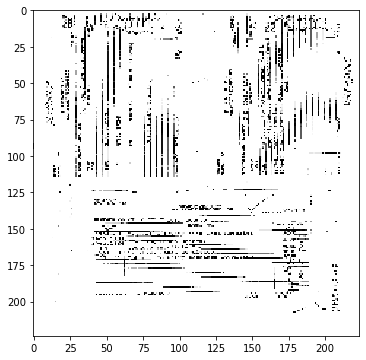

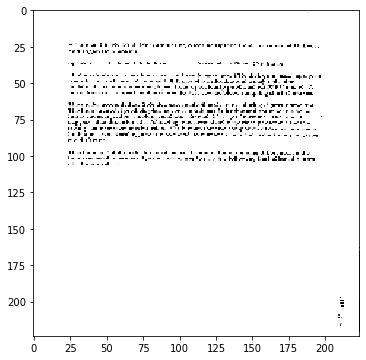

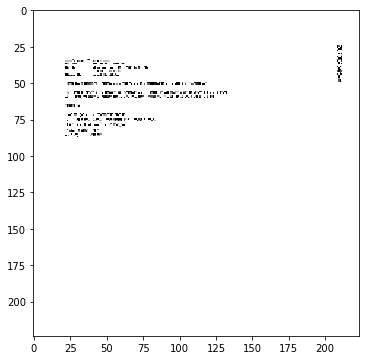

In [33]:
lb = LabelBinarizer()
lb.fit(list(classes))

x_train = np.array(data_train)
y_train =lb.transform(np.array(train_label))

x_test = np.array(data_test)
y_test = lb.transform(np.array(test_label))

x_val = np.array(data_val)
y_val = lb.transform(np.array(val_label))

print("train images shape : ", x_train.shape)
print("train labels shape : ", y_train.shape)
print(x_train[0])

print("test shape : ", x_test.shape)
print(y_test.shape)
print("valdiation shape : ", x_val.shape)
print(y_val.shape)


for i in range(3) :
    plt.figure(figsize=(6,6))
    imgplot = plt.imshow(x_train[i])

print(train_label[0])
print(y_train[0])
print(lb.classes_)

In [34]:
base_model = VGG16(weights = "imagenet", include_top=False, input_shape = (img_size, img_size, channels))

#for layer in base_model.layers:
#    layer.trainable = False
    
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [46]:
model = models.Sequential()

model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu',  name='dense'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(classes), activation='softmax',  name='predictions'))

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               12845568  
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
predictions (Dense)          (None, 10)                5130      
Total params: 27,565,386
Trainable params: 27,565,386
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer=optimizers.Adam(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
filepath="weights.best.h5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
checkpoint = ModelCheckpoint('model_f.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='max')
callbacks_list = [checkpoint]
train_model = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=500,
                        verbose=1,
                        validation_data=(x_val, y_val),
                       callbacks = callbacks_list)

Train on 2785 samples, validate on 348 samples
Epoch 1/500
2785/2785 [==============================] - 28s 10ms/step - loss: 0.0094 - acc: 0.9989 - val_loss: 1.7445 - val_acc: 0.8362
Epoch 2/500


C:\ProgramData\Anaconda3\envs\keras-gpu\lib\site-packages\keras\callbacks.py:434: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


 608/2785 [=====>........................] - ETA: 20s - loss: 2.3944e-05 - acc: 1.0000

KeyboardInterrupt: 

In [50]:
from keras.models import load_model

In [53]:
model = load_model('model.h5')

In [ ]:
checkpoint = ModelCheckpoint('model_f.h5', verbose=1, monitor='val_acc',save_best_only=True, mode='max')
callbacks_list = [checkpoint]
train_model = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=500,
                        verbose=1,
                        validation_data=(x_val, y_val),
                       callbacks = callbacks_list)

Train on 2785 samples, validate on 348 samples
Epoch 1/500
2785/2785 [==============================] - 29s 10ms/step - loss: 0.2722 - acc: 0.9127 - val_loss: 0.9704 - val_acc: 0.7902

Epoch 00001: val_acc improved from -inf to 0.79023, saving model to model_f.h5
Epoch 2/500
2785/2785 [==============================] - 28s 10ms/step - loss: 0.1725 - acc: 0.9465 - val_loss: 0.9287 - val_acc: 0.7874

Epoch 00002: val_acc did not improve from 0.79023
Epoch 3/500
2785/2785 [==============================] - 29s 10ms/step - loss: 0.1020 - acc: 0.9673 - val_loss: 1.0319 - val_acc: 0.7989

Epoch 00003: val_acc improved from 0.79023 to 0.79885, saving model to model_f.h5
Epoch 4/500
2785/2785 [==============================] - 28s 10ms/step - loss: 0.0703 - acc: 0.9785 - val_loss: 0.9558 - val_acc: 0.8046

Epoch 00004: val_acc improved from 0.79885 to 0.80460, saving model to model_f.h5
Epoch 5/500
2785/2785 [==============================] - 28s 10ms/step - loss: 0.0519 - acc: 0.9824 - val_lo


Epoch 00042: val_acc did not improve from 0.84483
Epoch 43/500
2785/2785 [==============================] - 28s 10ms/step - loss: 0.0183 - acc: 0.9935 - val_loss: 1.1299 - val_acc: 0.8218

Epoch 00043: val_acc did not improve from 0.84483
Epoch 44/500
2785/2785 [==============================] - 28s 10ms/step - loss: 0.0078 - acc: 0.9968 - val_loss: 1.1031 - val_acc: 0.8420

Epoch 00044: val_acc did not improve from 0.84483
Epoch 45/500
2785/2785 [==============================] - 28s 10ms/step - loss: 0.0155 - acc: 0.9953 - val_loss: 1.1543 - val_acc: 0.8218

Epoch 00045: val_acc did not improve from 0.84483
Epoch 46/500
2785/2785 [==============================] - 28s 10ms/step - loss: 0.0105 - acc: 0.9964 - val_loss: 1.2469 - val_acc: 0.8161

Epoch 00046: val_acc did not improve from 0.84483
Epoch 47/500
2785/2785 [==============================] - 29s 10ms/step - loss: 0.0064 - acc: 0.9975 - val_loss: 1.2690 - val_acc: 0.8333

Epoch 00047: val_acc did not improve from 0.84483
Epoc

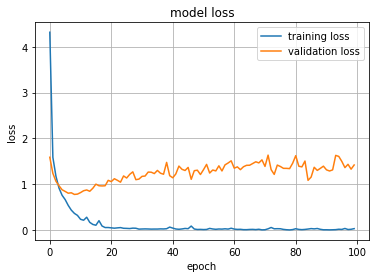

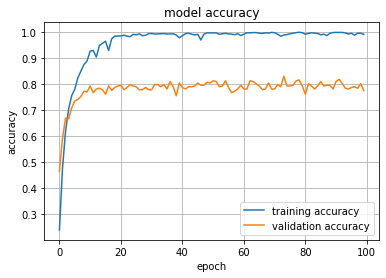

In [38]:
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()

plt.plot(train_model.history['acc'])
plt.plot(train_model.history['val_acc'])
plt.title('model accuracy')
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='lower right')
plt.show()

In [40]:
from keras.callbacks import ModelCheckpoint